In [11]:
from sympy import *

In [26]:
#general purpose code for interior edge

theta1=Symbol('\\theta_1')
theta2 =Symbol('\\theta_2')
lamb =Symbol('\lambda')
ell = Symbol('\ell')
mu1 =Symbol('\mu_1')
mu2 =Symbol('\mu_2')
p = Symbol('\p')

def t(price, lamb, ell):
    return (ell - price)/lamb 

def profit(theta1, mu1, price, lamb, ell):
    return t(price, lamb, ell)*(price - mu1*theta1)

foc_prof = diff(profit(theta1,mu1,p,lamb,ell), p)
price = solve(foc_prof,p)[0]
print(price)
print('----')
print(t(price,lamb,ell))

\ell/2 + \mu_1*\theta_1/2
----
(\ell/2 - \mu_1*\theta_1/2)/\lambda


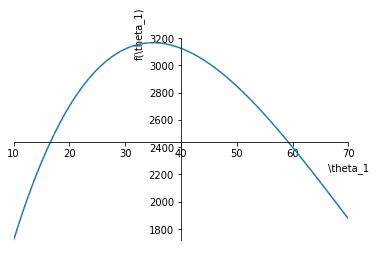

In [13]:
def nb_objective(theta1, mu1, price, lamb, ell):
    term1 = profit(theta1,  mu1, price, lamb, ell)
    term2 =  mu1*theta1*t(price, lamb, ell)
    return term1*term2

LIST = 70
COST = 10

obj = nb_objective(theta1,mu1,price,lamb,ell) 
obj = obj.subs({mu1:.5,lamb:COST,ell:LIST})
plot(obj, (theta1,COST,LIST))

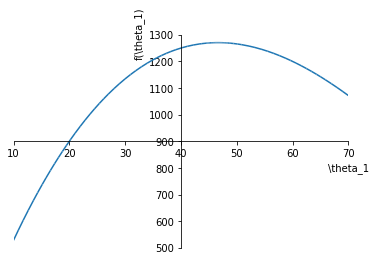

In [19]:
#need to see what happens when t=1
def nb_objective(theta1, mu1, price, lamb, ell):
    term1 = profit(theta1,  mu1, price, lamb, ell)
    term2 =  mu1*theta1
    return term1*term2

LIST = 70
COST = 10

obj = nb_objective(theta1,mu1,price,lamb,ell) 
obj = obj.subs({mu1:.5,lamb:COST,ell:LIST})
plot(obj, (theta1,COST,LIST))

(\ell/2 - \mu_1*\theta_1/2)/\lambda
[(\ell - 2*\lambda)/\mu_1]
-----
-0.025*\theta_1 + 7/2


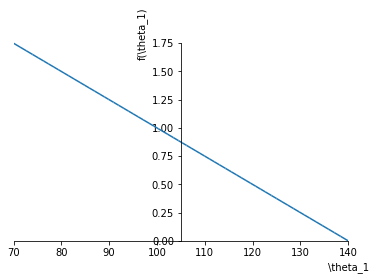

In [20]:
tobj =  t(price, lamb, ell)
print(tobj)
print(solve(1-tobj,theta1))
print('-----')
tobj = tobj.subs({mu1:.5,ell:70,lamb:10})
print(tobj)
plot(tobj, (theta1,LIST,2*LIST))

In [21]:
print(simplify(nb_objective(theta1,mu1,price,lamb,ell)))

\mu_1*\theta_1*(\ell - \mu_1*\theta_1)**2/(4*\lambda)


In [22]:
foc_nb = diff(nb_objective(theta1,mu1,price,lamb,ell),theta1)
theta1_max = solve(foc_nb,theta1)
print(theta1_max[0])

for theta_sol in theta1_max:
    maxval = nb_objective(theta1,mu1,price,lamb,ell).subs({theta1:theta_sol})
    print(maxval.subs({lamb:10,ell:70}))

\ell/(3*\mu_1)
34300/27
0


In [25]:
print('simult')
outside_option = t(price.subs({theta1:theta1_max[0]}),lamb,ell)*mu1*theta1_max[0]
print(outside_option)
print('t -----')
print(t(price.subs({theta1:theta1_max[0]}),lamb,ell)) #need to fix this, should be <1
print('sequential -----')
print(t(price,lamb,ell)*mu1*theta1)


simult
\ell**2/(9*\lambda)
t -----
\ell/(3*\lambda)
sequential -----
\mu_1*\theta_1*(\ell/2 - \mu_1*\theta_1/2)/\lambda
